# NBA GOAT - Michael Jordan, Kobe Bryant and Lebron James Stats Dataset
## by Tanishq Kaushik

In [1]:
# Importing all the necessary files
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

# For looking at the statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For carrying out Welch's ANOVA and Games-Howell Post-Hoc test
import pingouin as pg
from pingouin import pairwise_ttests

# For running the machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To supress warning messages
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
all_games_stats = pd.read_csv("allgames_stats.csv")

In [4]:
all_games_stats.head()

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,0.00,0,0,NaN,0.0,0.0,NaN,0.0,1.0,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,0.00,0,0,NaN,1.0,2.0,0.5,0.0,0.0,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,0.67,1,2,0.50,0.0,0.0,NaN,0.0,0.0,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,0.38,2,3,0.67,2.0,4.0,0.5,0.0,3.0,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,0.00,0,0,NaN,2.0,2.0,1.0,1.0,2.0,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [5]:
new_allgames_stats = all_games_stats[['Player','Tm','Date','FG', 'FGA', 'FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PTS','RSorPO']].copy()

In [6]:
new_allgames_stats.describe(include='all')

,Player,Tm,Date,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,RSorPO
count,4254,4254,4254,4250.000000,4247.000000,4237.000000,4254.000000,4254.000000,3750.000000,4253.000000,4252.000000,4119.000000,4253.000000,4252.000000,4254.000000,4254.000000,4243.000000,4253.000000,4254.000000,4245.000000,4254
unique,3,5,3632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Kobe Bryant,LAL,2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular Season
freq,1566,1621,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3616
mean,NaN,NaN,NaN,9.956000,20.701907,0.478806,1.162435,3.478138,0.298587,6.402304,7.998589,0.794695,1.293910,5.044450,6.345087,5.724024,1.745934,0.701152,3.092619,27.444287,NaN
std,NaN,NaN,NaN,3.801338,6.387853,0.121048,1.371055,2.670980,0.276708,3.894380,4.524951,0.180556,1.277438,2.742909,3.127640,3.019336,1.402170,0.916192,1.859863,9.671222,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,7.000000,17.000000,0.400000,0.000000,1.000000,0.000000,4.000000,5.000000,0.690000,0.000000,3.000000,4.000000,4.000000,1.000000,0.000000,2.000000,21.000000,NaN
50%,NaN,NaN,NaN,10.000000,21.000000,0.480000,1.000000,3.000000,0.290000,6.000000,8.000000,0.820000,1.000000,5.000000,6.000000,5.000000,2.000000,0.000000,3.000000,27.000000,NaN
75%,NaN,NaN,NaN,12.000000,25.000000,0.560000,2.000000,5.000000,0.500000,9.000000,11.000000,0.930000,2.000000,7.000000,8.000000,8.000000,3.000000,1.000000,4.000000,34.000000,NaN


In [7]:
new_allgames_stats_final = new_allgames_stats.dropna()

In [8]:
new_allgames_stats_final.head()

,Player,Tm,Date,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,RSorPO
3,Kobe Bryant,LAL,1996-11-08,3.0,8.0,0.38,2,3,0.67,2.0,4.0,0.50,0.0,3.0,3,0,0.0,1.0,0,10.0,Regular Season
6,Kobe Bryant,LAL,1996-11-13,2.0,2.0,1.00,1,1,1.00,1.0,1.0,1.00,0.0,0.0,0,0,1.0,0.0,0,6.0,Regular Season
7,Kobe Bryant,LAL,1996-11-15,1.0,4.0,0.25,0,2,0.00,2.0,3.0,0.67,0.0,0.0,0,0,0.0,0.0,1,4.0,Regular Season
8,Kobe Bryant,LAL,1996-11-17,5.0,8.0,0.62,4,6,0.67,2.0,2.0,1.00,2.0,0.0,2,2,0.0,0.0,4,16.0,Regular Season
9,Kobe Bryant,LAL,1996-11-19,0.0,2.0,0.00,0,1,0.00,3.0,4.0,0.75,0.0,2.0,2,1,0.0,0.0,1,3.0,Regular Season


In [9]:
jordan = new_allgames_stats_final.loc[new_allgames_stats_final['Player'] == 'Michael Jordan']
kobe = new_allgames_stats_final.loc[new_allgames_stats_final['Player'] == 'Kobe Bryant']
lebron = new_allgames_stats_final.loc[new_allgames_stats_final['Player'] == 'Lebron James']

In [10]:
jordan.head()

,Player,Tm,Date,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,RSorPO
3011,Michael Jordan,CHI,1984-11-13,18.0,27.0,0.67,1,1,1.0,8.0,11.0,0.73,2.0,8.0,10,4,3.0,2.0,4,45.0,Regular Season
3012,Michael Jordan,CHI,1984-11-15,12.0,24.0,0.50,0,1,0.0,3.0,3.0,1.00,0.0,2.0,2,2,2.0,1.0,1,27.0,Regular Season
3014,Michael Jordan,CHI,1984-11-19,11.0,26.0,0.42,0,3,0.0,12.0,16.0,0.75,2.0,3.0,5,2,2.0,1.0,3,34.0,Regular Season
3017,Michael Jordan,CHI,1984-11-24,10.0,24.0,0.42,0,1,0.0,10.0,10.0,1.00,3.0,3.0,6,8,3.0,1.0,4,30.0,Regular Season
3019,Michael Jordan,CHI,1984-11-29,9.0,17.0,0.53,1,1,1.0,3.0,4.0,0.75,1.0,2.0,3,2,2.0,0.0,2,22.0,Regular Season


Text(0.5, 1.0, 'Jordan')

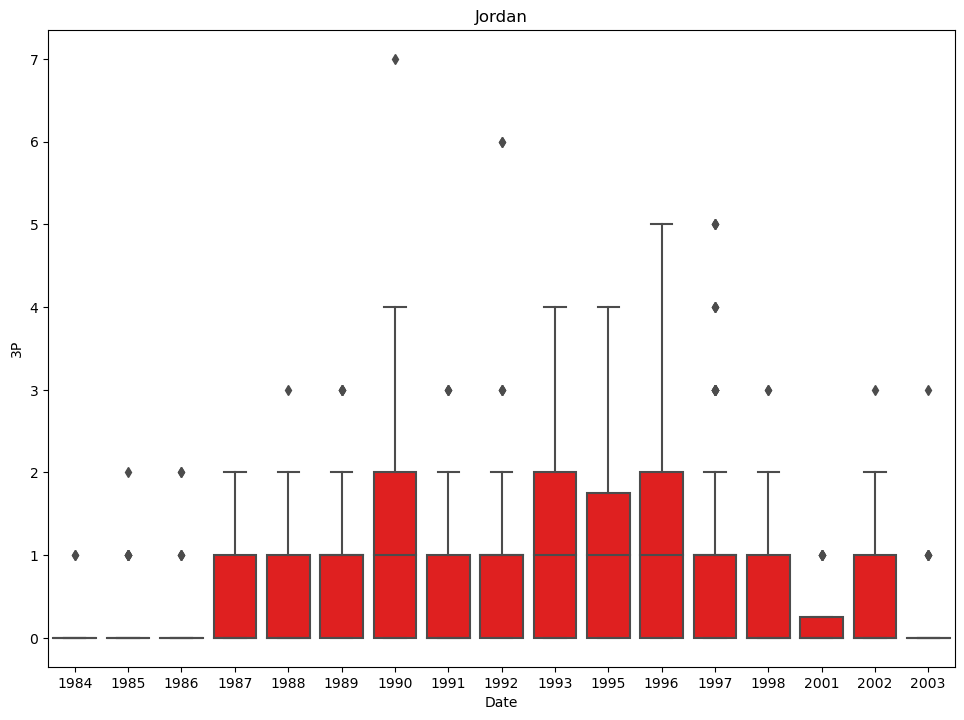

In [11]:
# Box plot for 3Ps scored by Jordan
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

jordan['Date'] = pd.to_datetime(jordan['Date'])
sns.boxplot(x=jordan['Date'].dt.year,y= jordan['3P'], color='red').set_title('Jordan')


Text(0.5, 1.0, 'Kobe')

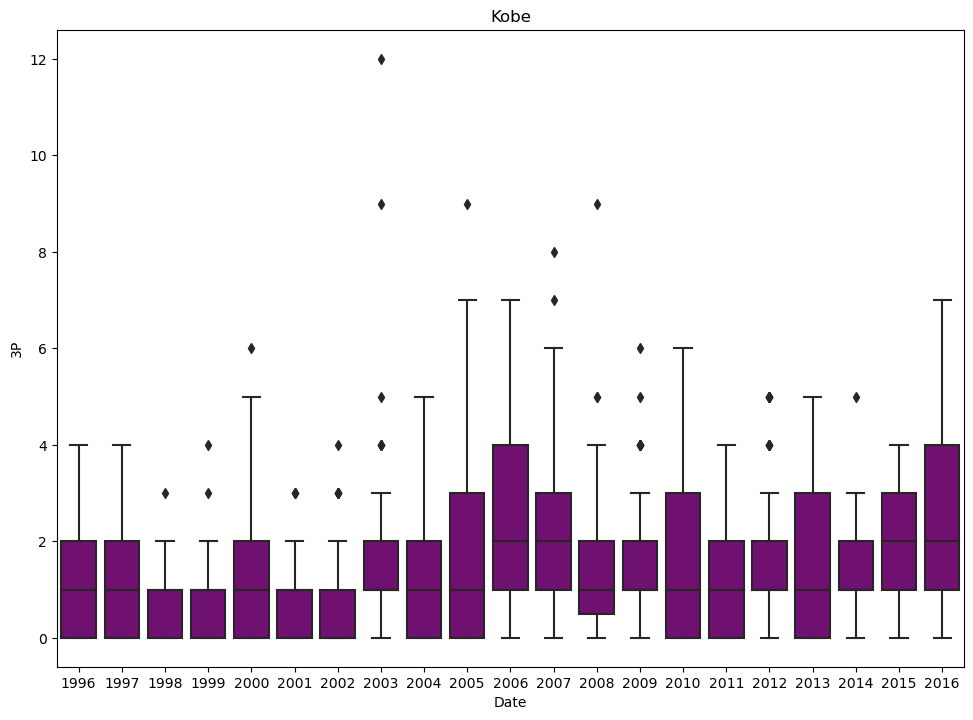

In [12]:
# Box plot for 3P scored by Kobe
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

kobe['Date'] = pd.to_datetime(kobe['Date'])
sns.boxplot(x=kobe['Date'].dt.year,y= kobe['3P'], color='purple').set_title('Kobe')

Text(0.5, 1.0, 'Lebron')

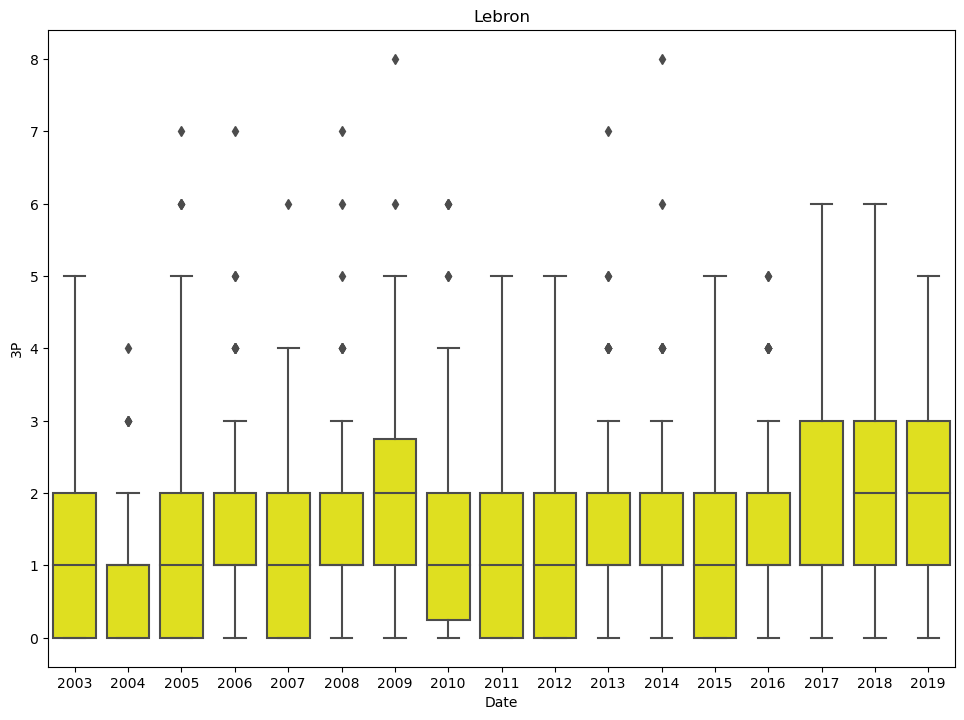

In [13]:
# Box plot for 3P scored by lebron
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

lebron['Date'] = pd.to_datetime(lebron['Date'])
sns.boxplot(x=lebron['Date'].dt.year, y=lebron['3P'], color='yellow').set_title('Lebron')

In [14]:
jordan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 3011 to 4253
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Player  855 non-null    object        
 1   Tm      855 non-null    object        
 2   Date    855 non-null    datetime64[ns]
 3   FG      855 non-null    float64       
 4   FGA     855 non-null    float64       
 5   FG%     855 non-null    float64       
 6   3P      855 non-null    int64         
 7   3PA     855 non-null    int64         
 8   3P%     855 non-null    float64       
 9   FT      855 non-null    float64       
 10  FTA     855 non-null    float64       
 11  FT%     855 non-null    float64       
 12  ORB     855 non-null    float64       
 13  DRB     855 non-null    float64       
 14  TRB     855 non-null    int64         
 15  AST     855 non-null    int64         
 16  STL     855 non-null    float64       
 17  BLK     855 non-null    float64       
 18  TOV   

In [15]:
jordan['year'] = jordan['Date'].apply(lambda x: x.year)
kobe['year'] = kobe['Date'].apply(lambda x: x.year)
lebron['year'] = lebron['Date'].apply(lambda x: x.year)


In [16]:
# Means for lebron 
year_means_lebron = lebron.groupby(['year']).PTS.mean()
y = pd.DataFrame(data = year_means_lebron)
year_means_lebron = y.rename(columns = {'year':'mean'}, inplace = False)

In [17]:
year_means_lebron

,PTS
year,
2003,21.592593
2004,23.136364
2005,29.480519
2006,30.478261
2007,27.526882
2008,29.611111
2009,29.797872
2010,27.895349
2011,27.123077


In [18]:
# Means for jordan
year_means_jordan = jordan.groupby(['year']).PTS.mean()
y = pd.DataFrame(data = year_means_jordan)
year_means_jordan = y.rename(columns = {'year':'mean'}, inplace = False)

In [19]:
year_means_jordan

,PTS
year,
1984,29.000000
1985,29.206897
1986,30.500000
1987,35.840909
1988,36.536585
1989,32.746479
1990,34.052632
1991,30.974026
1992,32.686567


In [20]:
# Means for kobe
year_means_kobe = kobe.groupby(['year']).PTS.mean()
y = pd.DataFrame(data = year_means_kobe)
year_means_kobe = y.rename(columns = {'year':'mean'}, inplace = False)

In [21]:
year_means_kobe

,PTS
year,
1996,8.375000
1997,15.526316
1998,15.021277
1999,20.678571
2000,25.082474
2001,28.086957
2002,26.267442
2003,29.464286
2004,26.964286


In [22]:
# Drop a few years for plotting the graph
year_means_kobe = year_means_kobe.drop([2010,2011,2012,2013], axis=0)


In [23]:
year_means_kobe

,PTS
year,
1996,8.375000
1997,15.526316
1998,15.021277
1999,20.678571
2000,25.082474
2001,28.086957
2002,26.267442
2003,29.464286
2004,26.964286


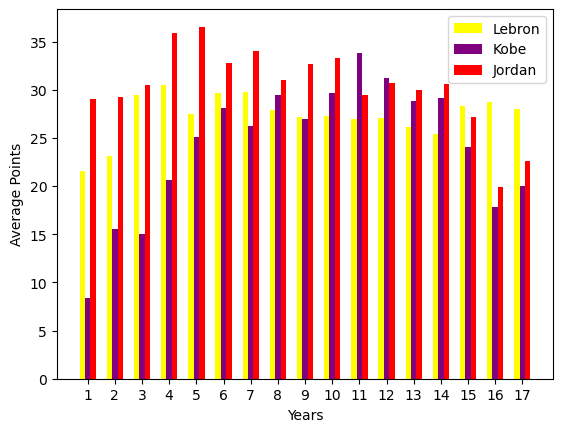

In [24]:
# Creating a plot for the average points scored over the years.
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(17)
y1 = year_means_lebron.PTS
y2 = year_means_kobe.PTS
y3 = year_means_jordan.PTS
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='yellow')
plt.bar(x, y2, width, color='purple')
plt.bar(x+0.2, y3, width, color='red')
plt.xticks(x, ['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17'])
plt.xlabel("Years")
plt.ylabel("Average Points")
plt.legend(["Lebron", "Kobe", "Jordan"])
plt.show()

### Running ANOVA to see if we can reject the null hypothesis and come to the conclusion that there is a statistically significant difference between the players on the basis of stat means.

In [25]:
# Performing Welch's ANOVA test for individual points scored
pg.welch_anova(dv='PTS', between='Player', data=new_allgames_stats_final)

,Source,ddof1,ddof2,F,p-unc,np2
0,Player,2,2141.523635,78.65162,1.092238e-33,0.042906


In [26]:
# Performing Welch's ANOVA test for individual free throws
pg.welch_anova(dv='FT', between='Player', data=new_allgames_stats_final)

,Source,ddof1,ddof2,F,p-unc,np2
0,Player,2,2119.693981,15.245579,2.667463e-07,0.008133


In [27]:
# Performing Welch's ANOVA test for individual 3 Pointers scored
pg.welch_anova(dv="3P", between='Player', data=new_allgames_stats_final)

,Source,ddof1,ddof2,F,p-unc,np2
0,Player,2,2317.408291,109.886231,2.548722e-46,0.042978


In [28]:
# Performing Welch's ANOVA test for Total Rebounds
pg.welch_anova(dv="TRB", between='Player', data=new_allgames_stats_final)

,Source,ddof1,ddof2,F,p-unc,np2
0,Player,2,2128.069155,214.075917,1.947052e-85,0.104421


In [29]:
# Performing Welch's ANOVA test for Individual field Goal percentage
pg.welch_anova(dv="FG%", between='Player', data=new_allgames_stats_final)

,Source,ddof1,ddof2,F,p-unc,np2
0,Player,2,2247.185076,94.494335,3.946984e-40,0.051994


In [30]:
# Performing Welch's ANOVA test for individual assists
pg.welch_anova(dv="AST", between='Player', data=new_allgames_stats_final)

,Source,ddof1,ddof2,F,p-unc,np2
0,Player,2,2169.732681,266.605415,2.953951e-104,0.131296


### Running Games-Howell Post-Hoc Tests on every stat

In [31]:
# Test Result for PTS(total points) - 1. Michael 2. Lebron 3. Kobe
pg.pairwise_gameshowell(data=new_allgames_stats_final,dv='PTS',between='Player')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Kobe Bryant,Lebron James,26.404134,27.636761,-1.232627,0.336646,-3.661491,2666.327412,7.471406e-04,-0.138655
1,Kobe Bryant,Michael Jordan,26.404134,31.240936,-4.836802,0.397208,-12.177012,1964.982666,1.061706e-12,-0.513471
2,Lebron James,Michael Jordan,27.636761,31.240936,-3.604174,0.365931,-9.849332,1664.557228,0.000000e+00,-0.439992


In [32]:
# Test Result for FG% - 1. Lebron 2. Michael 3. Kobe
pg.pairwise_gameshowell(data=new_allgames_stats_final,dv='FG%',between='Player')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Kobe Bryant,Lebron James,0.445895,0.502108,-0.056213,0.004302,-13.065629,2771.994434,4.969358e-13,-0.495902
1,Kobe Bryant,Michael Jordan,0.445895,0.491310,-0.045415,0.004518,-10.053059,2029.396735,5.438983e-13,-0.418917
2,Lebron James,Michael Jordan,0.502108,0.491310,0.010798,0.004491,2.404398,1999.276018,4.300809e-02,0.101377


In [33]:
# Test Result for 3P- 1. Lebron,Kobe(can't prove with a statistical significance) 2. Michael
pg.pairwise_gameshowell(data=new_allgames_stats_final,dv='3P',between='Player')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Kobe Bryant,Lebron James,1.471133,1.509117,-0.037984,0.054624,-0.695379,2769.441918,0.76621,-0.026384
1,Kobe Bryant,Michael Jordan,1.471133,0.810526,0.660607,0.054040,12.224479,2182.247950,0.00000,0.492582
2,Lebron James,Michael Jordan,1.509117,0.810526,0.698591,0.052869,13.213541,2125.577942,0.00000,0.542757


In [34]:
# Test Result for FT - 1.Michael 2.Kobe 3.Lebron
pg.pairwise_gameshowell(data=new_allgames_stats_final,dv='FT',between='Player')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Kobe Bryant,Lebron James,6.625089,6.168490,0.456599,0.139059,3.283492,2748.009701,2.981011e-03,0.124492
1,Kobe Bryant,Michael Jordan,6.625089,7.038596,-0.413507,0.168465,-2.454557,1797.354556,3.775021e-02,-0.106580
2,Lebron James,Michael Jordan,6.168490,7.038596,-0.870106,0.162329,-5.360149,1647.801612,2.842909e-07,-0.240150


In [35]:
# Test Result for TRB - 1.Lebron 2.Michael 3.Kobe
pg.pairwise_gameshowell(data=new_allgames_stats_final,dv='TRB',between='Player')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Kobe Bryant,Lebron James,5.393443,7.670314,-2.276871,0.110021,-20.694810,2723.916527,0.000000e+00,-0.786684
1,Kobe Bryant,Michael Jordan,5.393443,6.405848,-1.012405,0.125919,-8.040118,1673.830767,2.062794e-13,-0.356764
2,Lebron James,Michael Jordan,7.670314,6.405848,1.264466,0.131621,9.606876,1834.036060,0.000000e+00,0.416942


In [36]:
# Test Result for AST - 1.Lebron 2. Michael 3.Kobe
pg.pairwise_gameshowell(data=new_allgames_stats_final,dv='AST',between='Player')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Kobe Bryant,Lebron James,4.82680,7.216630,-2.389830,0.106661,-22.405863,2749.893763,1.036393e-12,-0.851302
1,Kobe Bryant,Michael Jordan,4.82680,5.326316,-0.499516,0.118232,-4.224872,1793.452682,7.447261e-05,-0.183573
2,Lebron James,Michael Jordan,7.21663,5.326316,1.890314,0.121932,15.502984,1892.581878,0.000000e+00,0.666146
